# Reinforced learning, työllistyminen ja Suomen sosiaaliturva

Tässä tehdään laskelmat artikkelia varten. Käytössä on gym-ympäristö _unemployment-v1_ , johon on toteutettu yksityiskohtaisesti sosiaaliturvaa eri tiloissa.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

In [2]:
#import sys
#print(sys.path)
#sys.path.append('/usr/local/python3.7/site-packages')

Then load all modules and set parameters for simulations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


In [2]:
# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=20_000 # size of the population to be simulated
size1=20_000_000 # number of timesteps in phase 1 training (callback not used)
size2=100_000_000 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=20_000_000 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1_00 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli='best/malli_perus_final'
perusresults='results/perus_results_final'
prefmalli='best/malli_perus_prefnoise'
prefresults='results/perus_results_prefnoise'

# Nykymalli 

Lasketaan työllisyysasteet nykymallissa.

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

train...
phase 1
batch 9 learning rate 0.125 scaled 0.375




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...








---------------------------------
| explained_variance | 0.999    |
| fps                | 3365     |
| nupdates           | 1        |
| policy_entropy     | 0.874    |
| policy_loss        | -0.049   |
| total_timesteps    | 0        |
| value_loss         | 0.0121   |
---------------------------------


--------

---------------------------------
| explained_variance | 0.977    |
| fps                | 3553     |
| nupdates           | 60       |
| policy_entropy     | 0.861    |
| policy_loss        | -0.0233  |
| total_timesteps    | 1287203  |
| value_loss         | 0.255    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 3547     |
| nupdates           | 70       |
| policy_entropy     | 0.849    |
| policy_loss        | 0.0737   |
| total_timesteps    | 1505373  |
| value_loss         | 0.234    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 3544     |
| nupdates           | 80       |
| policy_entropy     | 0.831    |
| policy_loss        | -0.0283  |
| total_timesteps    | 1723543  |
| value_loss         | 0.206    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3510     |
| nupdates           | 330      |
| policy_entropy     | 0.861    |
| policy_loss        | -0.00672 |
| total_timesteps    | 7177793  |
| value_loss         | 0.0162   |
---------------------------------
---------------------------------
| explained_variance | 0.998    |
| fps                | 3510     |
| nupdates           | 340      |
| policy_entropy     | 0.866    |
| policy_loss        | -0.00916 |
| total_timesteps    | 7395963  |
| value_loss         | 0.0202   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3509     |
| nupdates           | 350      |
| policy_entropy     | 0.89     |
| policy_loss        | -0.013   |
| total_timesteps    | 7614133  |
| value_loss         | 0.0109   |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3504     |
| nupdates           | 600      |
| policy_entropy     | 0.873    |
| policy_loss        | -0.011   |
| total_timesteps    | 13068383 |
| value_loss         | 0.00708  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3504     |
| nupdates           | 610      |
| policy_entropy     | 0.872    |
| policy_loss        | -0.0148  |
| total_timesteps    | 13286553 |
| value_loss         | 0.00734  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3504     |
| nupdates           | 620      |
| policy_entropy     | 0.873    |
| policy_loss        | -0.0118  |
| total_timesteps    | 13504723 |
| value_loss         | 0.00819  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps         

---------------------------------
| explained_variance | 0.999    |
| fps                | 3501     |
| nupdates           | 870      |
| policy_entropy     | 0.875    |
| policy_loss        | -0.0144  |
| total_timesteps    | 18958973 |
| value_loss         | 0.00845  |
---------------------------------
---------------------------------
| explained_variance | 0.999    |
| fps                | 3501     |
| nupdates           | 880      |
| policy_entropy     | 0.884    |
| policy_loss        | -0.012   |
| total_timesteps    | 19177143 |
| value_loss         | 0.00724  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps                | 3501     |
| nupdates           | 890      |
| policy_entropy     | 0.889    |
| policy_loss        | -0.0134  |
| total_timesteps    | 19395313 |
| value_loss         | 0.00577  |
---------------------------------
---------------------------------
| explained_variance | 1        |
| fps         

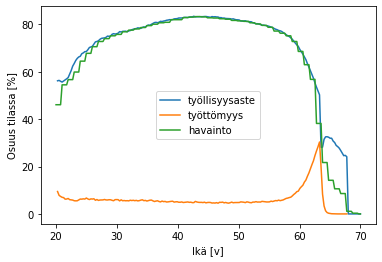

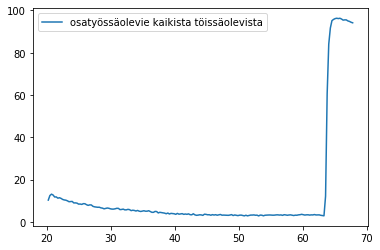

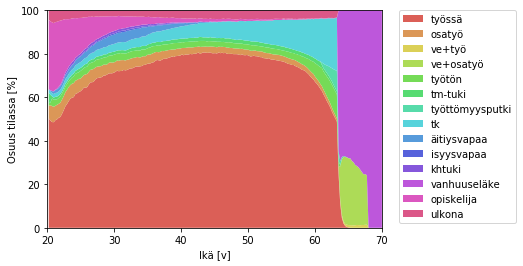

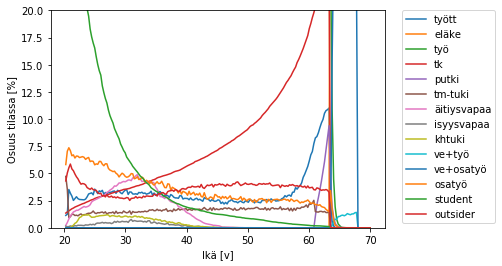

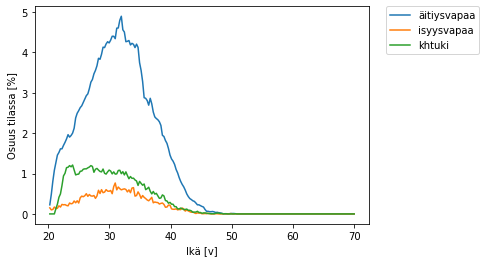

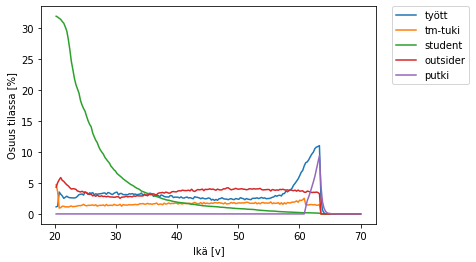

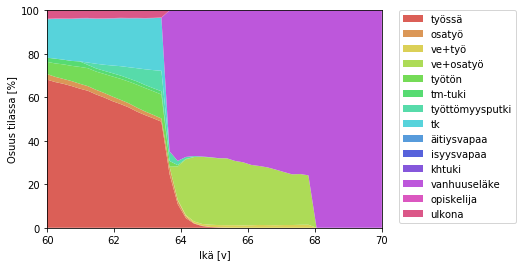

keskimääräinen työttömyysaste 6.385232822678292


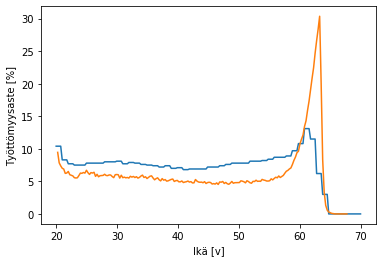

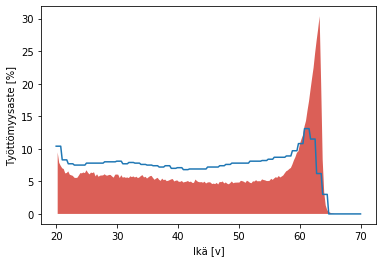

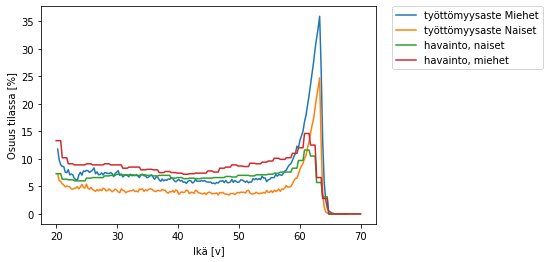

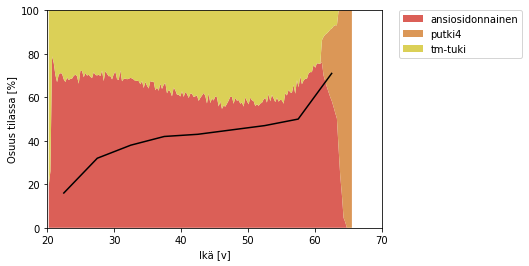

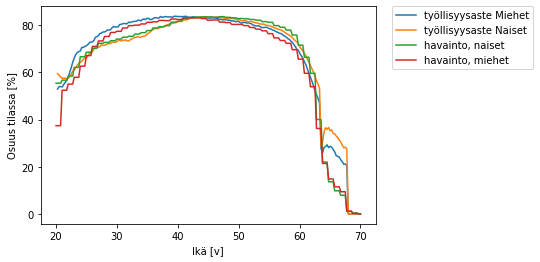

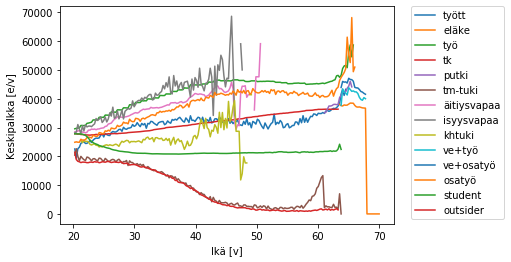

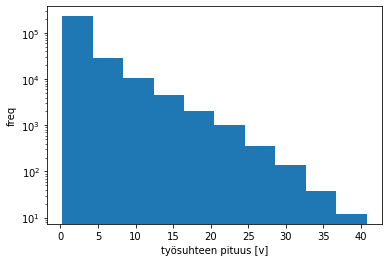

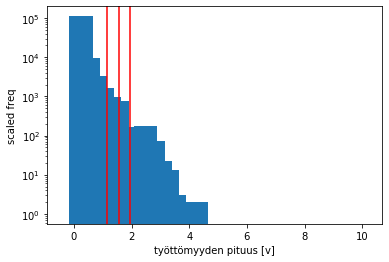

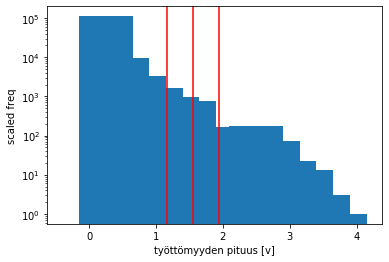

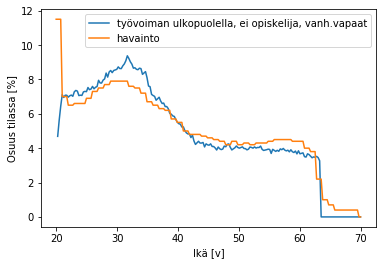

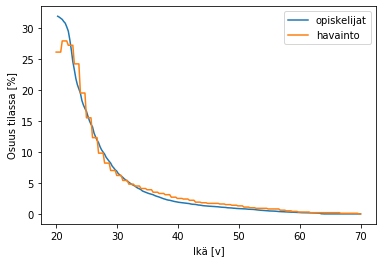

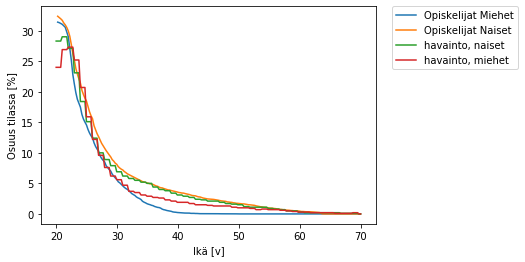

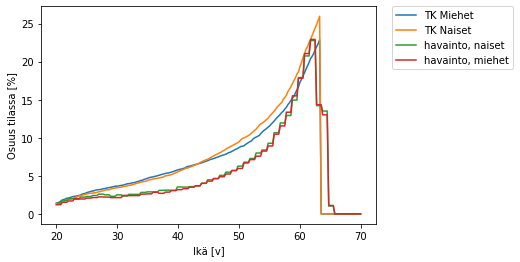

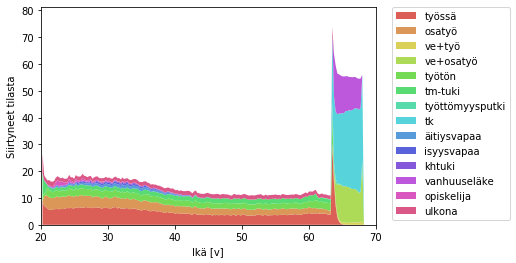

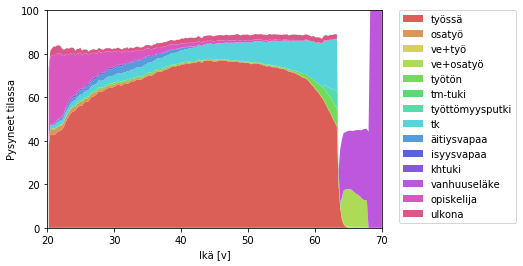

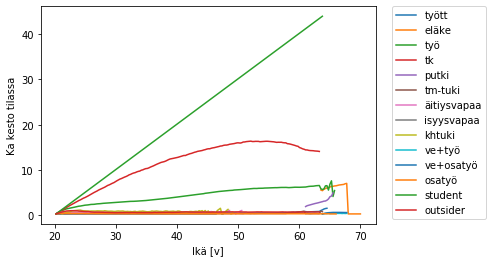

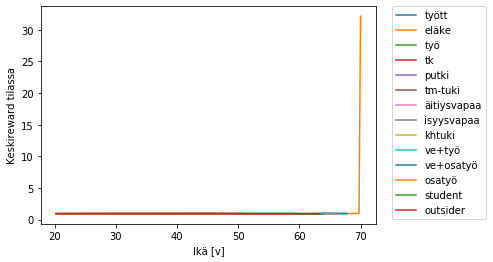

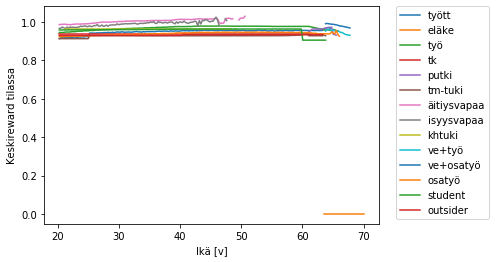

No handles with labels found to put in legend.


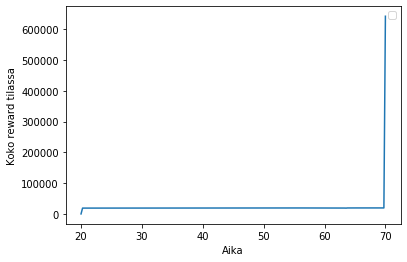

Yhteensä reward 224.959589739194


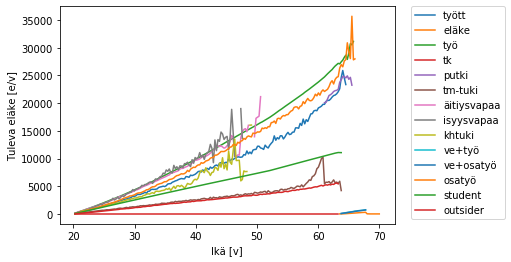

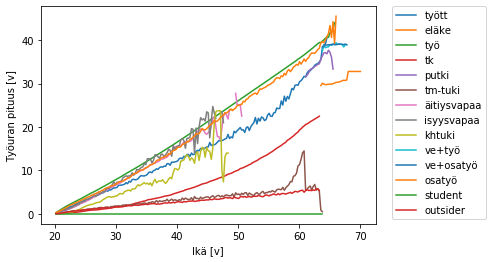

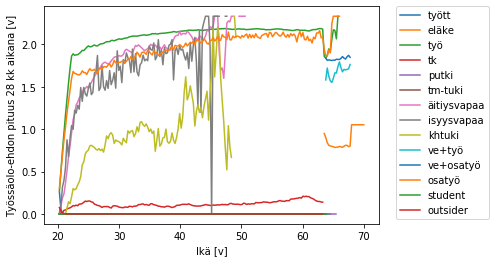

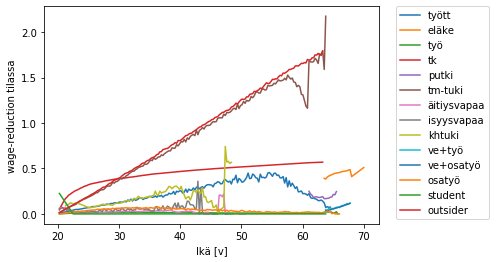

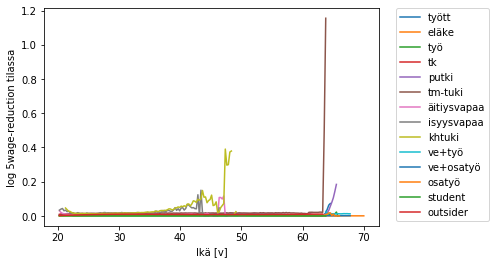

In [5]:
cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc1.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=perusmalli,plot=True,cont=True,start_from=perusmalli,results=perusresults,
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True



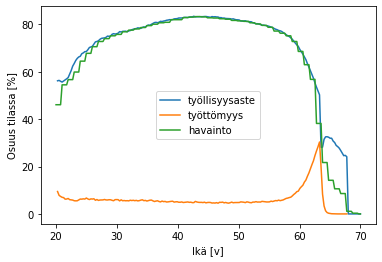

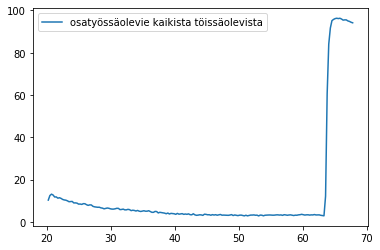

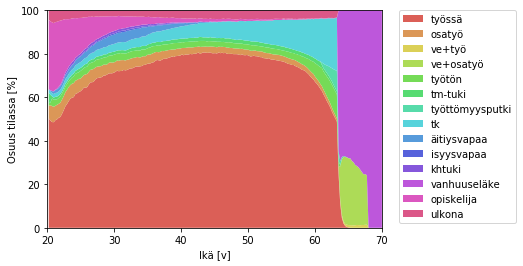

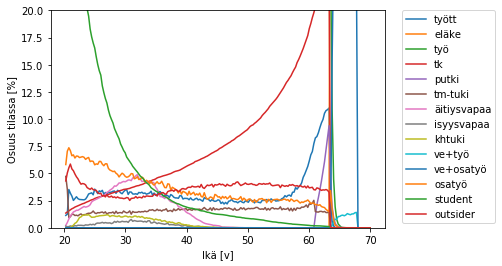

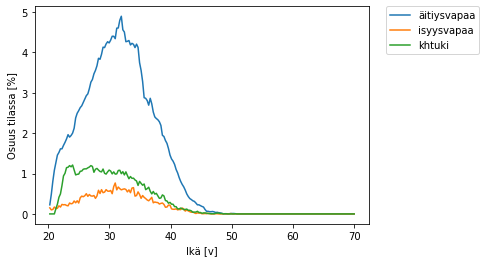

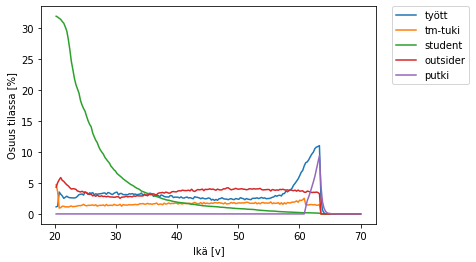

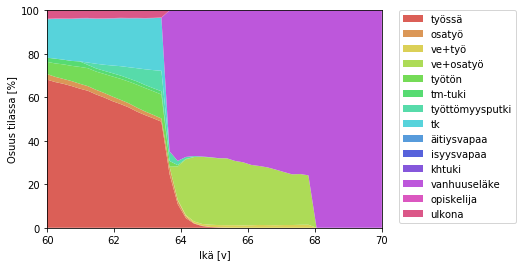

keskimääräinen työttömyysaste 6.385232822678292


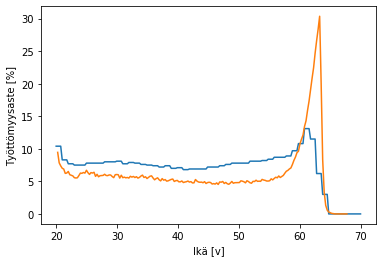

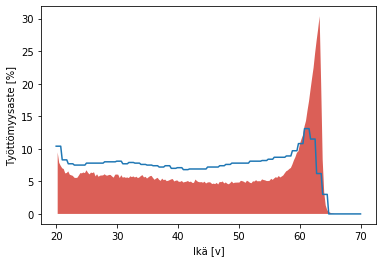

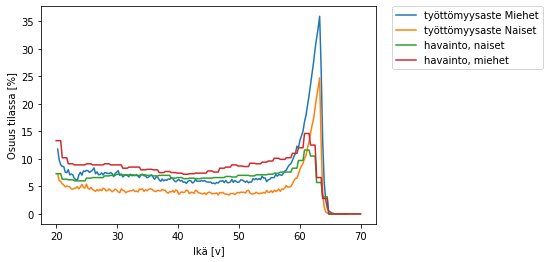

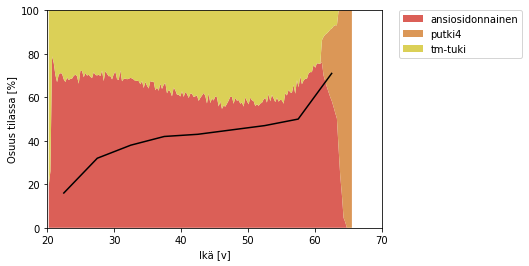

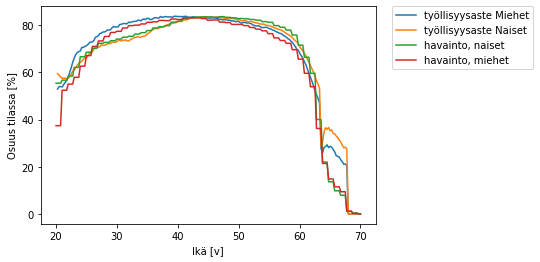

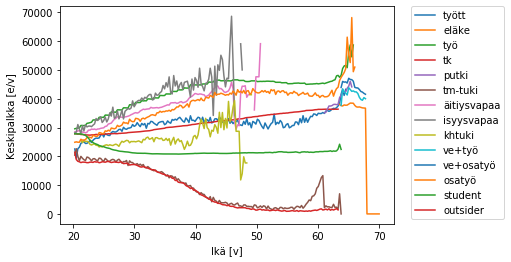

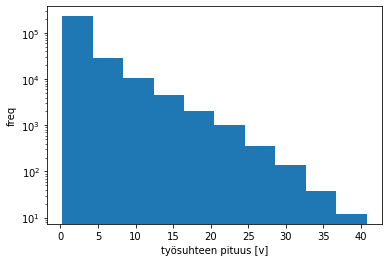

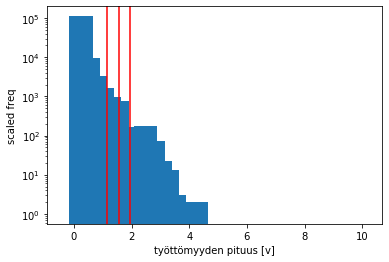

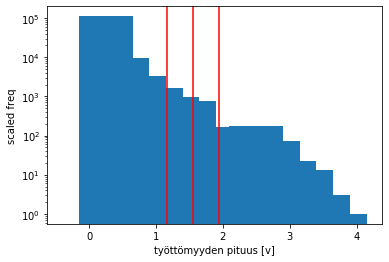

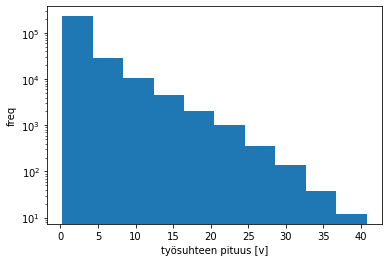

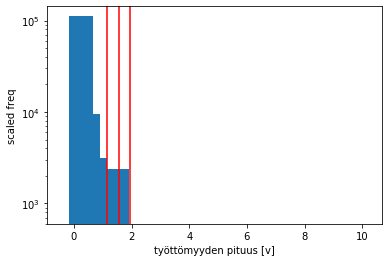

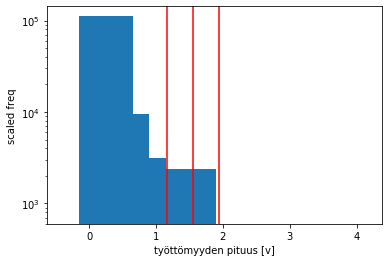

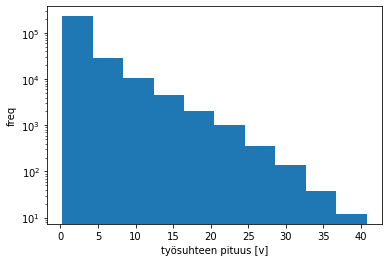

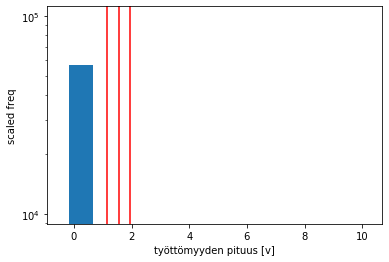

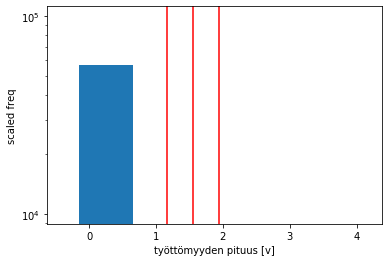

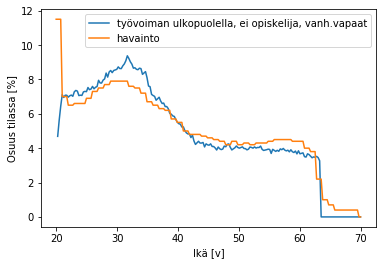

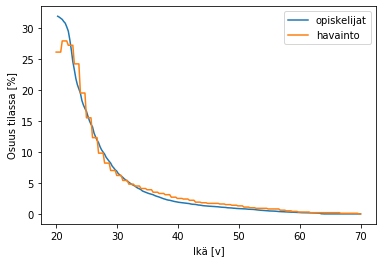

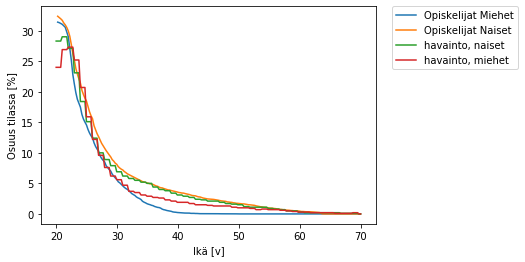

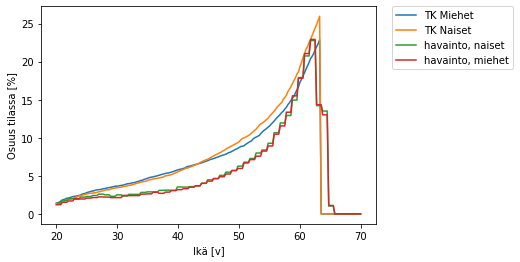

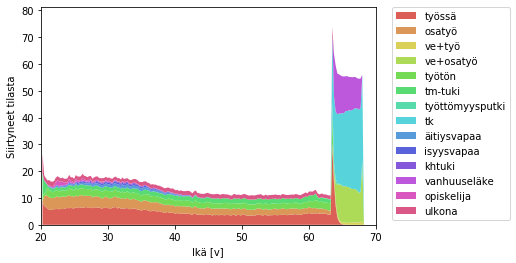

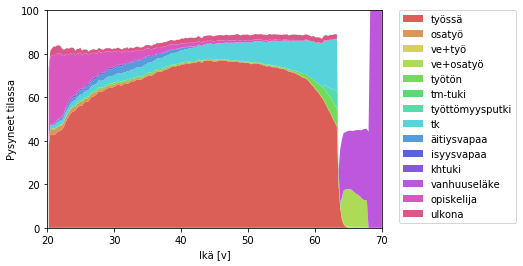

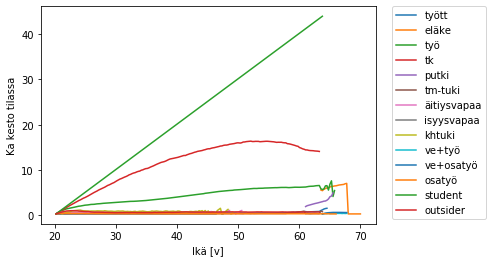

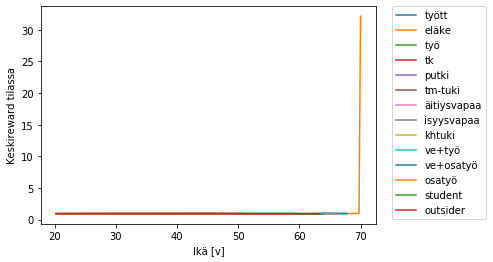

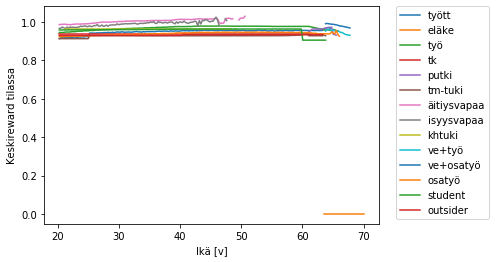

No handles with labels found to put in legend.


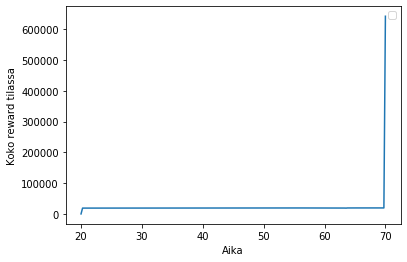

Yhteensä reward 224.959589739194


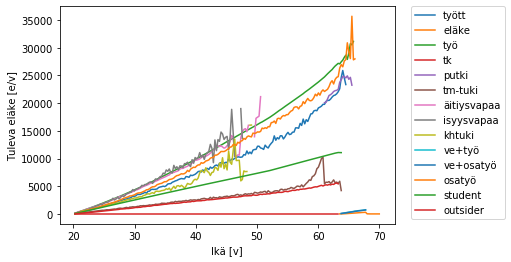

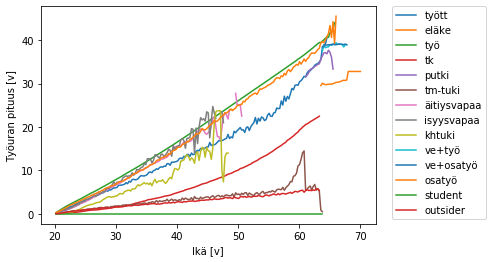

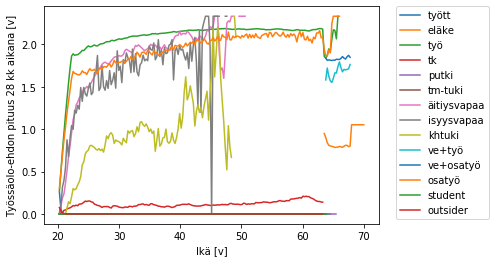

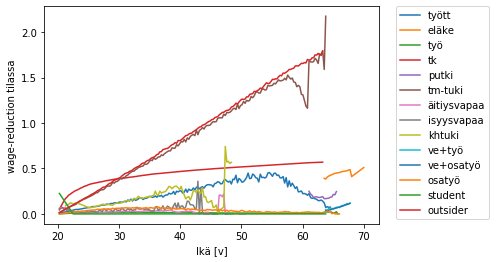

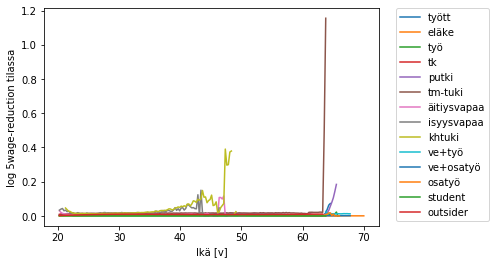

In [3]:
cc1b=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc1b.render(load=perusresults)

# Preference noise

In [7]:
cc2=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False,preferencenoise=True)
cc2.run_results(debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=perusmalli,plot=True,cont=True,start_from=perusmalli,results=prefresults,
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)

cc2.compare_with(cc1) 

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68
ansiopvraha_kesto300 300
ansiopvraha_kesto400 400
ansiopvraha_toe 0.5
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki True
include_pinkslip True

train...
phase 1
batch 9 learning rate 0.125 scaled 0.375


ValueError: Error: the file best/malli_perus_prefnoise could not be found